In [1]:
# importing the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# visualization
import seaborn as sns
#importing the dataset
dataset=pd.read_csv("cleaned.csv")
#list of first five rows
dataset.head()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,36952,Female,Camera,Kodak,2001,3,10,6472,64720


In [5]:
#list of last five rows
dataset.tail()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480
45165,9478,1157632,1,43374,Female,Headphones,Etre Jeune,2018,10,7,7717,54019


In [6]:
dataset.shape

(45166, 12)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


In [8]:
# to get a better understanding of the dataset,
# we can also see the statistical summar of the dataset,

dataset['rating'].describe()

count    45166.000000
mean         4.218594
std          1.221118
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [9]:
# We can also see the number of unique users and items in the dataset

dataset.nunique()

item_id       1892
user_id      40401
rating           5
timestamp     4179
gender           2
category        10
brand           50
year            19
month           12
quantity         6
unitprice     5001
amount       19611
dtype: int64

In [10]:
dataset.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

# EDA

<Axes: title={'center': 'Year Wise Sales'}, ylabel='year'>

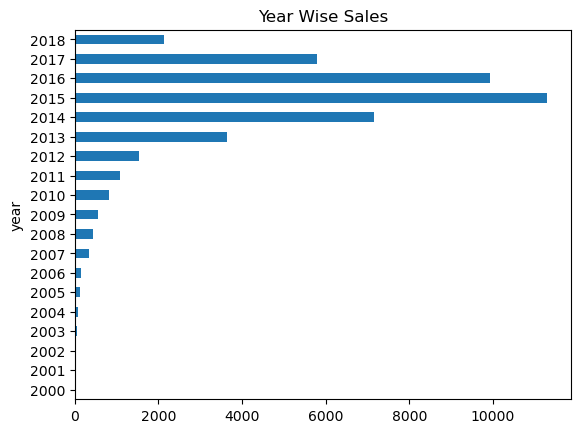

In [19]:
# what was the best year of sales

dataset.groupby('year')['amount'].count().plot(kind='barh',title='Year Wise Sales')

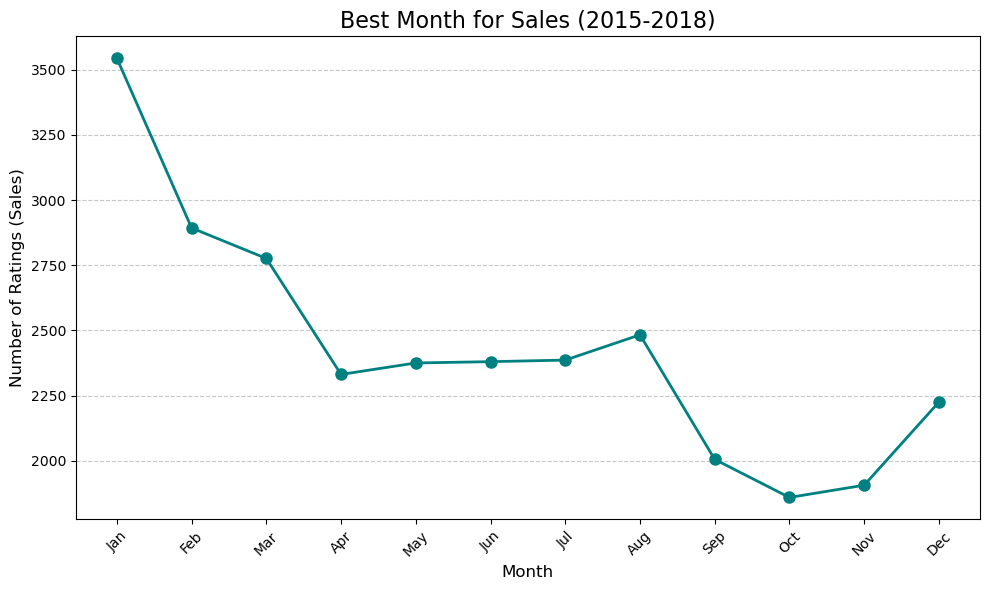

In [18]:
# Filter data for 2015 to 2018
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Group by month and count ratings
monthly_sales = dataset_2015_2018.groupby('month')['rating'].count()

# Create the plot with custom style (line plot)
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='teal', linewidth=2, markersize=8)

# Add title and labels
plt.title('Best Month for Sales (2015-2018)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Ratings (Sales)', fontsize=12)

# Add gridlines and customize ticks for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(monthly_sales.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Brand Wise Top 10 Sales 2015 to 2018'}, xlabel='brand'>

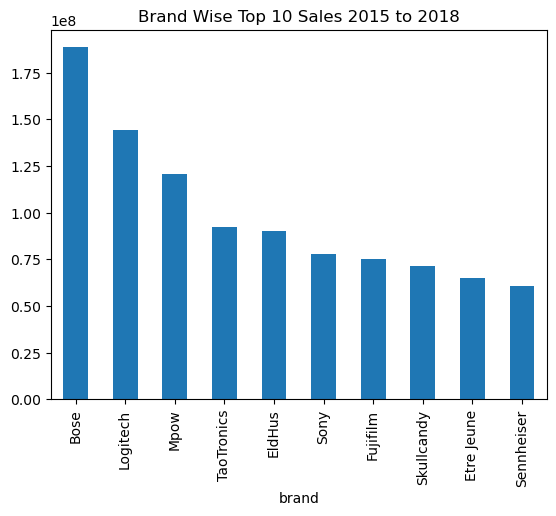

In [20]:
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']
<= 2018)]
dataset_2015_2018.groupby('brand')['amount'].sum().sort_values(ascending
=False).head(10)\
.plot(kind='bar',title='Brand Wise Top 10 Sales 2015 to 2018',y='amount')


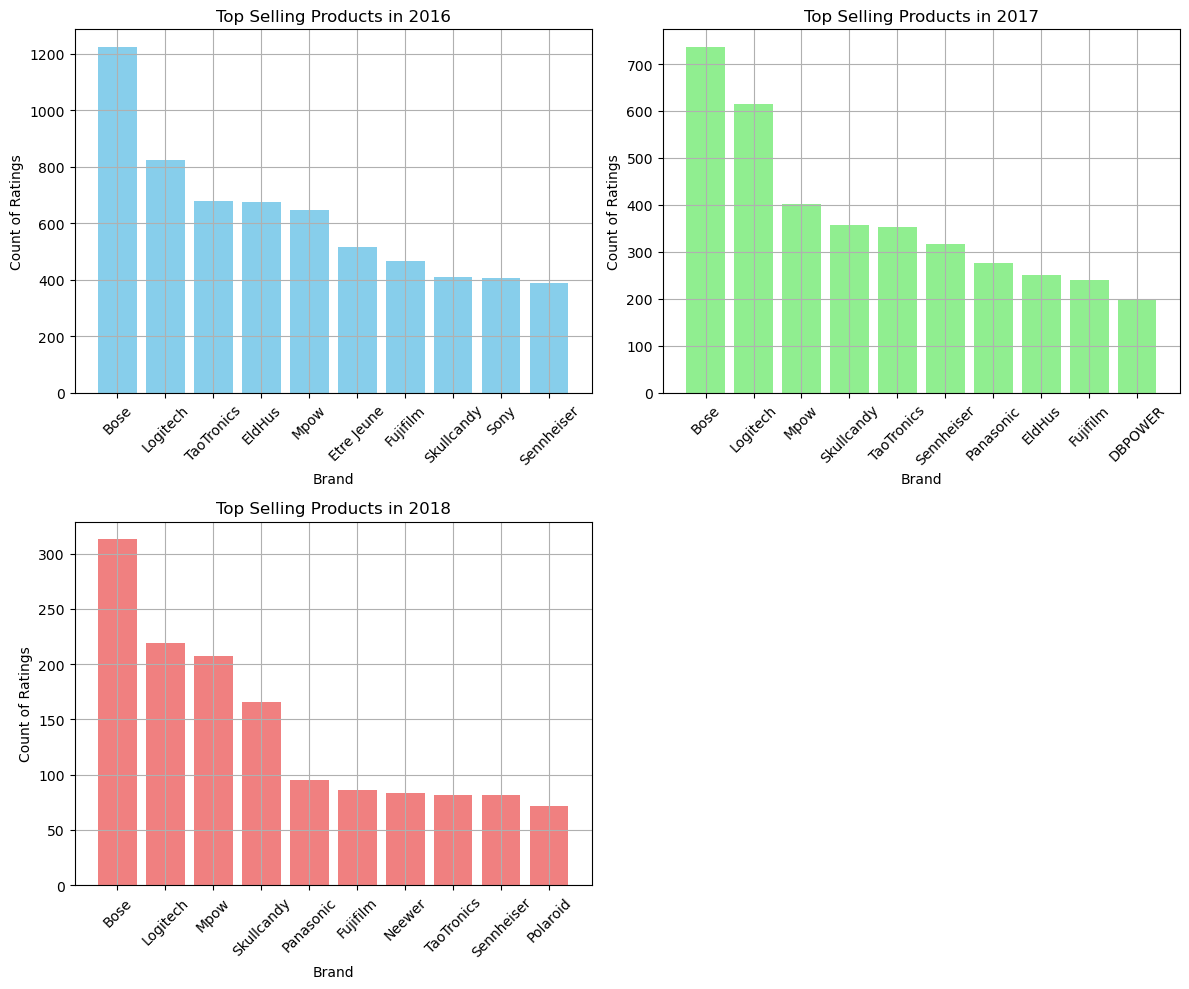

In [11]:
# What products sold the most in the three years 2016, 2017 & 2018
# Create subplots with 2 rows and 2 columns

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for 2016
top_selling_2016 = dataset[dataset['year'] == 2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 0].bar(top_selling_2016.index, top_selling_2016, color='skyblue')
axs[0, 0].set_title('Top Selling Products in 2016')
axs[0, 0].set_xlabel('Brand')
axs[0, 0].set_ylabel('Count of Ratings')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plot for 2017
top_selling_2017 = dataset[dataset['year'] == 2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 1].bar(top_selling_2017.index, top_selling_2017, color='lightgreen')
axs[0, 1].set_title('Top Selling Products in 2017')
axs[0, 1].set_xlabel('Brand')
axs[0, 1].set_ylabel('Count of Ratings')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plot for 2018
top_selling_2018 = dataset[dataset['year'] == 2018].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[1, 0].bar(top_selling_2018.index, top_selling_2018, color='lightcoral')
axs[1, 0].set_title('Top Selling Products in 2018')
axs[1, 0].set_xlabel('Brand')
axs[1, 0].set_ylabel('Count of Ratings')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Hide the empty subplot
axs[1, 1].axis('off')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()


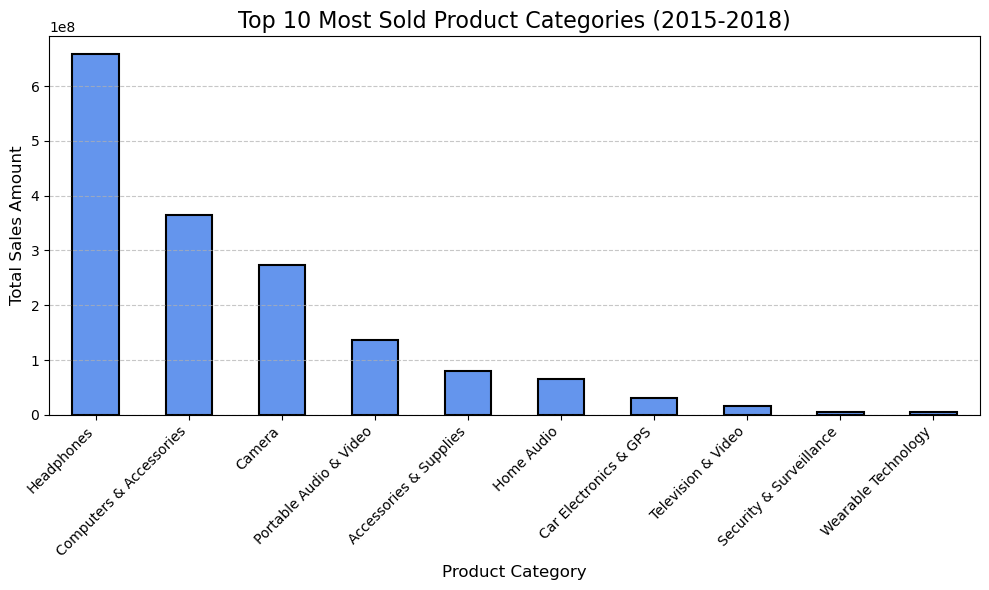

In [15]:

# Filter data for 2015 to 2018
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Get top 10 most sold product categories
top_categories = dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=False).head(10)

# Create the plot with custom colors and gridlines
plt.figure(figsize=(10, 6))
bars = top_categories.plot(kind='bar', color='cornflowerblue', edgecolor='black', linewidth=1.5)

# Add title and labels
plt.title('Top 10 Most Sold Product Categories (2015-2018)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)

# Add gridlines and rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


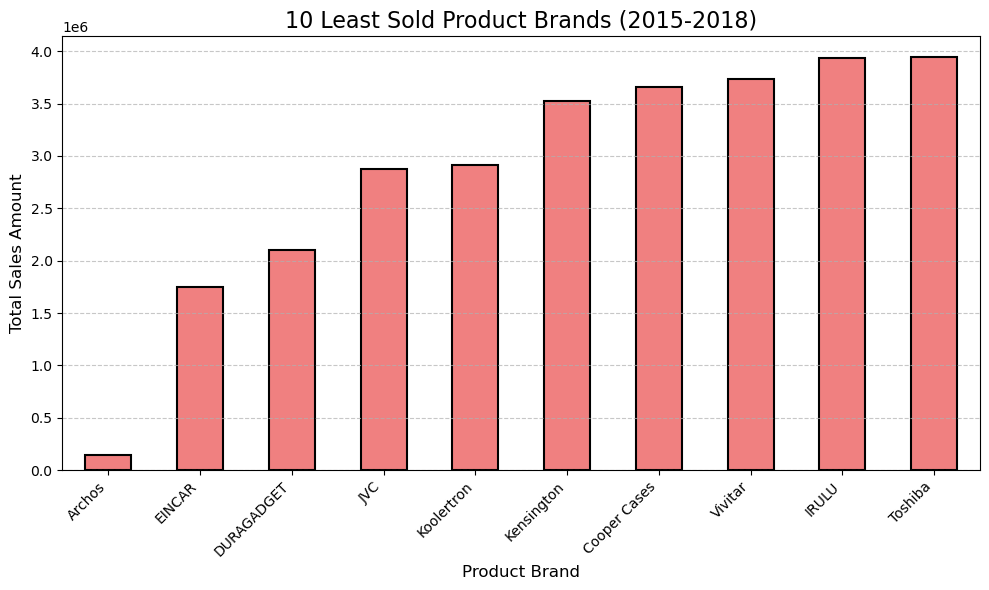

In [16]:
# Filter data for 2015 to 2018
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Get top 10 least sold product brands
least_sold_brands = dataset2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=True).head(10)

# Create the plot with custom colors and gridlines
plt.figure(figsize=(10, 6))
bars = least_sold_brands.plot(kind='bar', color='lightcoral', edgecolor='black', linewidth=1.5)

# Add title and labels
plt.title('10 Least Sold Product Brands (2015-2018)', fontsize=16)
plt.xlabel('Product Brand', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)

# Add gridlines and rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


<Axes: xlabel='rating', ylabel='count'>

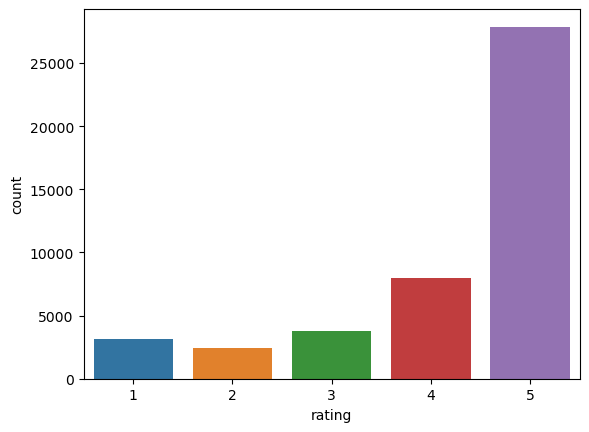

In [15]:
# # the distribution of ratings
sns.countplot(x='rating', data=dataset)

<Axes: title={'center': '10 most rating Brand 2015 to 2018'}, xlabel='brand'>

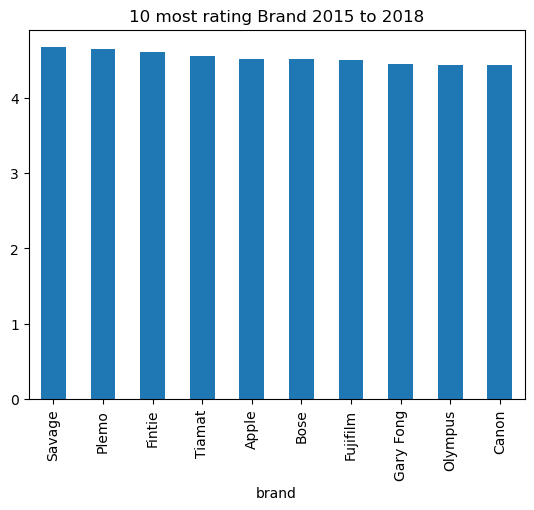

In [34]:
# What is the most rated brand name between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar',title='10 most rating Brand 2015 to 2018')


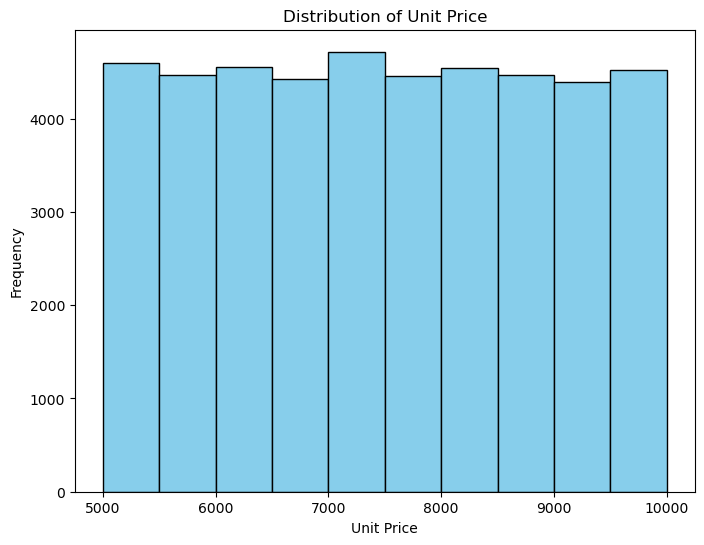

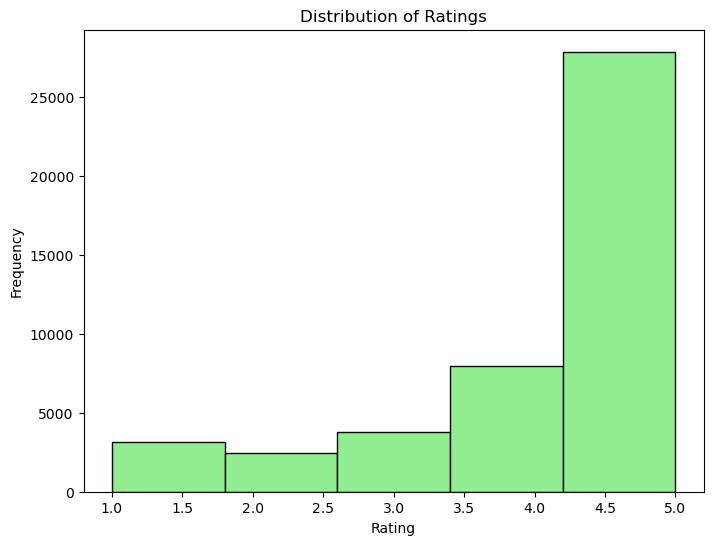

In [29]:
# Histogram for Unit Price
plt.figure(figsize=(8, 6))
plt.hist(dataset['unitprice'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

# Histogram for Ratings
plt.figure(figsize=(8, 6))
plt.hist(dataset['rating'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


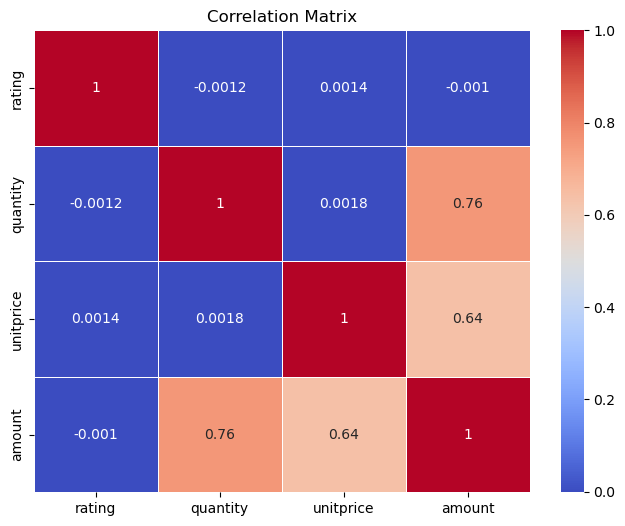

In [30]:
# Correlation Matrix
correlation_matrix = dataset[['rating', 'quantity', 'unitprice', 'amount']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

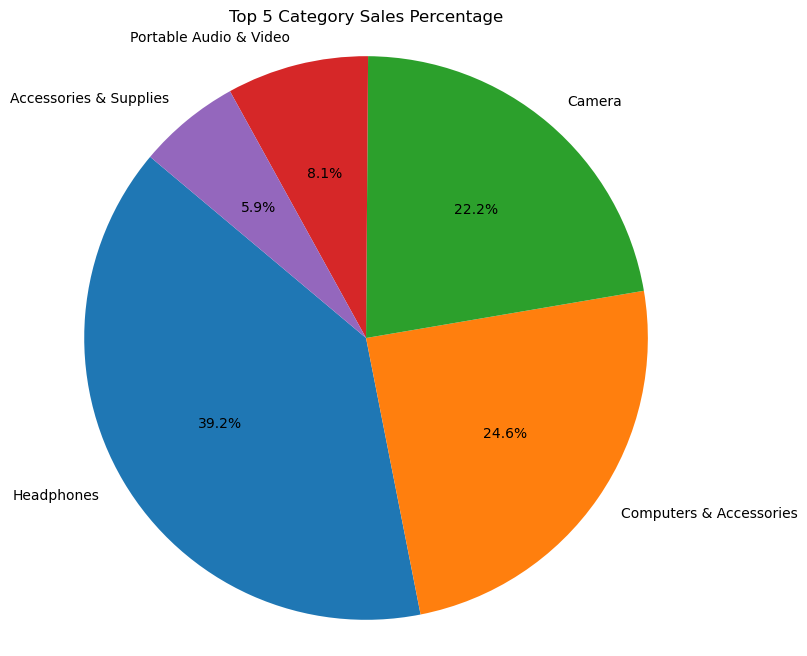

In [16]:
top_5_categories = dataset.groupby('category')['amount'].sum().sort_values(ascending=False).head(5)

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=140)  # Adjust startangle for better label positioning

# Add title and adjust text properties
plt.title('Top 5 Category Sales Percentage')
 # Add total sales label at the center

# Equal aspect ratio for a circular pie chart
plt.axis('equal')

# Show the plot
plt.show()

<Axes: title={'center': 'Top 5 Brand wise salespercentage'}, ylabel='rating'>

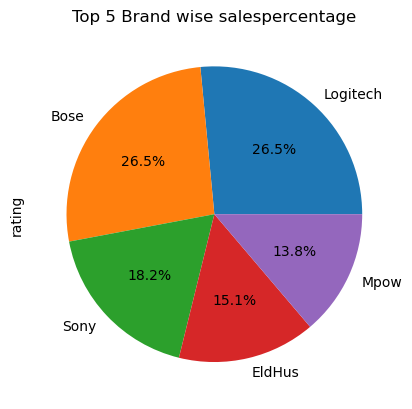

In [17]:
# brand wise sales percentage
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 Brand wise salespercentage')

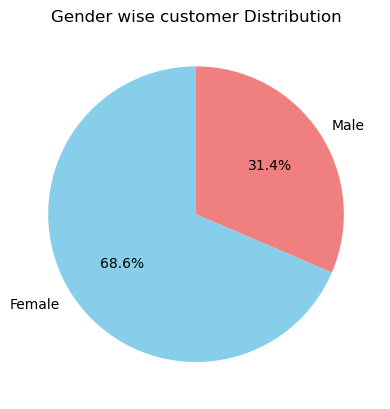

In [18]:
# Gender wise customer distribution
gender_distribution = dataset['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index,
autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender wise customer Distribution')
plt.show()